### Importing Libraries

In [1]:
import re
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("loan_data_train.csv")
test = pd.read_csv("loan_data_test.csv")

In [3]:
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [4]:
train.shape

(2200, 15)

In [5]:
test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [7]:
test.shape

(300, 14)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              300 non-null    int64  
 1   Amount.Requested                300 non-null    int64  
 2   Amount.Funded.By.Investors      300 non-null    object 
 3   Loan.Length                     300 non-null    object 
 4   Loan.Purpose                    300 non-null    object 
 5   Debt.To.Income.Ratio            300 non-null    object 
 6   State                           300 non-null    object 
 7   Home.Ownership                  300 non-null    object 
 8   Monthly.Income                  300 non-null    float64
 9   FICO.Range                      300 non-null    object 
 10  Open.CREDIT.Lines               300 non-null    object 
 11  Revolving.CREDIT.Balance        300 non-null    int64  
 12  Inquiries.in.the.Last.6.Months  300 

In [9]:
test['Interest.Rate'] = 'testdata'

In [10]:
train = pd.concat((train, test))

In [11]:
train.shape

(2500, 15)

In [12]:
train.columns = train.columns.str.replace('.', '_')

## Sanity Check


In [13]:
train.dtypes

ID                                float64
Amount_Requested                   object
Amount_Funded_By_Investors         object
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

### Amount_Requested

In [14]:
train.loc[train.Amount_Requested == '.', 'Amount_Requested'] = np.nan

In [15]:
train.Amount_Requested = train.Amount_Requested.astype(float)

In [16]:
float(np.nan)

nan

In [17]:
train.Amount_Requested

0      25000.0
1      19750.0
2       2100.0
3      28000.0
4      24250.0
        ...   
295    12000.0
296     5000.0
297     4375.0
298    13600.0
299     6000.0
Name: Amount_Requested, Length: 2500, dtype: float64

### Amount_Funded_By_Investors

In [18]:
train.loc[train.Amount_Funded_By_Investors == '.']

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
110,16667.0,3000.0,.,17.44%,36 months,other,15.79%,MD,RENT,7952.0,660-664,4,12578,0.0,8 years
1091,3660.0,1000.0,.,13.16%,36 months,other,19.63%,MI,RENT,3500.0,670-674,9,11189,2.0,2 years
1983,4227.0,3000.0,.,8.59%,36 months,other,3.72%,MA,MORTGAGE,4167.0,765-769,4,7074,0.0,5 years
5,33777.0,6000.0,.,testdata,36 months,home_improvement,2.52%,NJ,MORTGAGE,4800.0,750-754,.,1442,0.0,10+ years


In [19]:
pd.to_numeric(train.Amount_Funded_By_Investors, errors = 'coerce').isna().sum()

5

In [20]:
def replace_obj(col):
    train[col] = pd.to_numeric(train[col], errors = 'coerce')
replace_obj('Amount_Funded_By_Investors')

### Interest_Rate

In [21]:
train.Interest_Rate

0        18.49%
1        17.27%
2        14.33%
3        16.29%
4        12.23%
         ...   
295    testdata
296    testdata
297    testdata
298    testdata
299    testdata
Name: Interest_Rate, Length: 2500, dtype: object

In [22]:
train.Interest_Rate.replace('%', '', regex = True, inplace = True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2495 non-null   float64
 2   Amount_Funded_By_Investors      2495 non-null   float64
 3   Interest_Rate                   2500 non-null   object 
 4   Loan_Length                     2499 non-null   object 
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2496 non-null   object 
 12  Revolving_CREDIT_Balance        249

In [24]:
def text_replace(col):    
    train[col] = pd.to_numeric(train[col].str.replace('months', ' ').str.replace('.', ''), errors='coerce')
    return train[col]

text_replace('Loan_Length')

0      60.0
1      60.0
2      36.0
3      36.0
4      60.0
       ... 
295    60.0
296    36.0
297    36.0
298    60.0
299    36.0
Name: Loan_Length, Length: 2500, dtype: float64

In [25]:
train.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

### Debt_To_Income_Ratio

In [26]:
train.Debt_To_Income_Ratio = train.Debt_To_Income_Ratio.replace('%','', regex = True).astype(float)

In [27]:
train.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

### Fico_range

In [28]:
s = train.FICO_Range.apply(lambda x:x.split('-'))

In [29]:
train.FICO_Range = s.apply(lambda x:(int(x[0]) + int(x[1]))/2)

In [30]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210,3.0,5 years
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070,3.0,4 years
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893,1.0,< 1 year
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194,1.0,10+ years
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061,2.0,10+ years


In [31]:
train.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [32]:
# Employment_Length
train.Employment_Length.value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment_Length, dtype: int64

In [33]:
s = train.Employment_Length.replace(r'[a-z +]','', regex = True)
s.value_counts()

10    653
<1    249
2     243
3     235
5     202
4     191
1     177
6     163
7     127
8     108
9      72
.       2
Name: Employment_Length, dtype: int64

In [34]:
s[s=='<1'] = 0.5

In [35]:
s

0        5
1        4
2      0.5
3       10
4       10
      ... 
295      7
296     10
297      6
298     10
299      2
Name: Employment_Length, Length: 2500, dtype: object

In [36]:
s[s=='.'] = np.nan
s = s.astype(float)

In [37]:
train.Employment_Length = s

In [38]:
train.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
dtype: object

In [39]:
# Revolving_Credit_Balance
train.Revolving_CREDIT_Balance = pd.to_numeric(train.Revolving_CREDIT_Balance, errors = 'coerce')

In [40]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0


### Missing values

In [41]:
train.isna().sum()

ID                                 1
Amount_Requested                   5
Amount_Funded_By_Investors         5
Interest_Rate                      0
Loan_Length                        2
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 80
dtype: int64

In [42]:
train.dropna()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.00,testdata,60.0,home_improvement,13.91,NV,MORTGAGE,7083.33,707.0,7,3923.0,2.0,7.0
296,69456.0,5000.0,5000.00,testdata,36.0,debt_consolidation,17.22,CA,OWN,4000.00,707.0,10,6023.0,0.0,10.0
297,97954.0,4375.0,4375.00,testdata,36.0,credit_card,9.09,CA,RENT,2916.67,672.0,9,6944.0,2.0,6.0
298,36931.0,13600.0,13600.00,testdata,60.0,credit_card,12.85,MN,RENT,5651.33,677.0,13,24383.0,0.0,10.0


In [43]:
train.shape

(2500, 15)

In [44]:
data= train.copy()

In [45]:
data

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.00,testdata,60.0,home_improvement,13.91,NV,MORTGAGE,7083.33,707.0,7,3923.0,2.0,7.0
296,69456.0,5000.0,5000.00,testdata,36.0,debt_consolidation,17.22,CA,OWN,4000.00,707.0,10,6023.0,0.0,10.0
297,97954.0,4375.0,4375.00,testdata,36.0,credit_card,9.09,CA,RENT,2916.67,672.0,9,6944.0,2.0,6.0
298,36931.0,13600.0,13600.00,testdata,60.0,credit_card,12.85,MN,RENT,5651.33,677.0,13,24383.0,0.0,10.0


In [46]:
train.shape

(2500, 15)

### Outliers

In [47]:
data.dropna(inplace = True)
data

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11,15210.0,3.0,5.0
1,75473.0,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14,19070.0,3.0,4.0
2,67265.0,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,692.0,13,893.0,1.0,0.5
3,80167.0,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12,38194.0,1.0,10.0
4,17240.0,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000.0,11975.00,testdata,60.0,home_improvement,13.91,NV,MORTGAGE,7083.33,707.0,7,3923.0,2.0,7.0
296,69456.0,5000.0,5000.00,testdata,36.0,debt_consolidation,17.22,CA,OWN,4000.00,707.0,10,6023.0,0.0,10.0
297,97954.0,4375.0,4375.00,testdata,36.0,credit_card,9.09,CA,RENT,2916.67,672.0,9,6944.0,2.0,6.0
298,36931.0,13600.0,13600.00,testdata,60.0,credit_card,12.85,MN,RENT,5651.33,677.0,13,24383.0,0.0,10.0


In [48]:
# Object- Categorical
# Numeric (less unique values)- Categorical
# Numeric (More unnique values)- Numeric continuous

In [49]:
num_col = []

for i in data:
    if data[i].dtypes!= object and data[i].nunique()>5:
        num_col.append(i)

In [50]:
num_col

['ID',
 'Amount_Requested',
 'Amount_Funded_By_Investors',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Revolving_CREDIT_Balance',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

In [51]:
num_col = num_col[0:6]

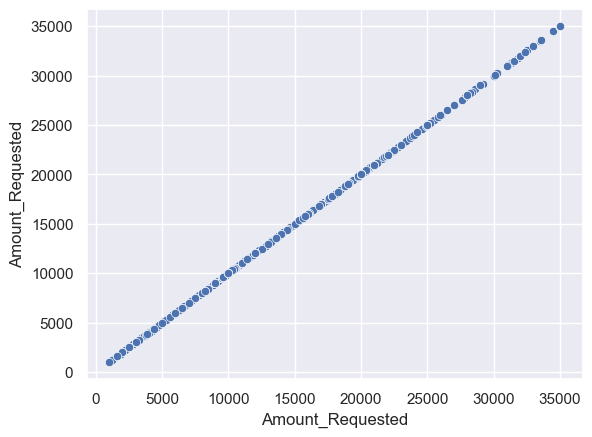

In [52]:
sns.scatterplot(x = data.Amount_Requested, y = data.Amount_Requested)
plt.show()

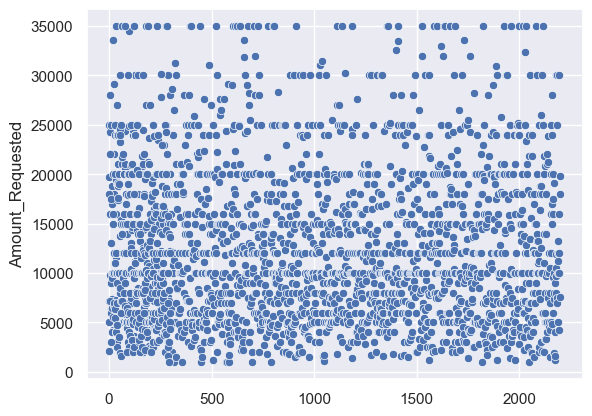

In [53]:
sns.scatterplot(x = data.Amount_Requested.index, y = data.Amount_Requested)
plt.show()

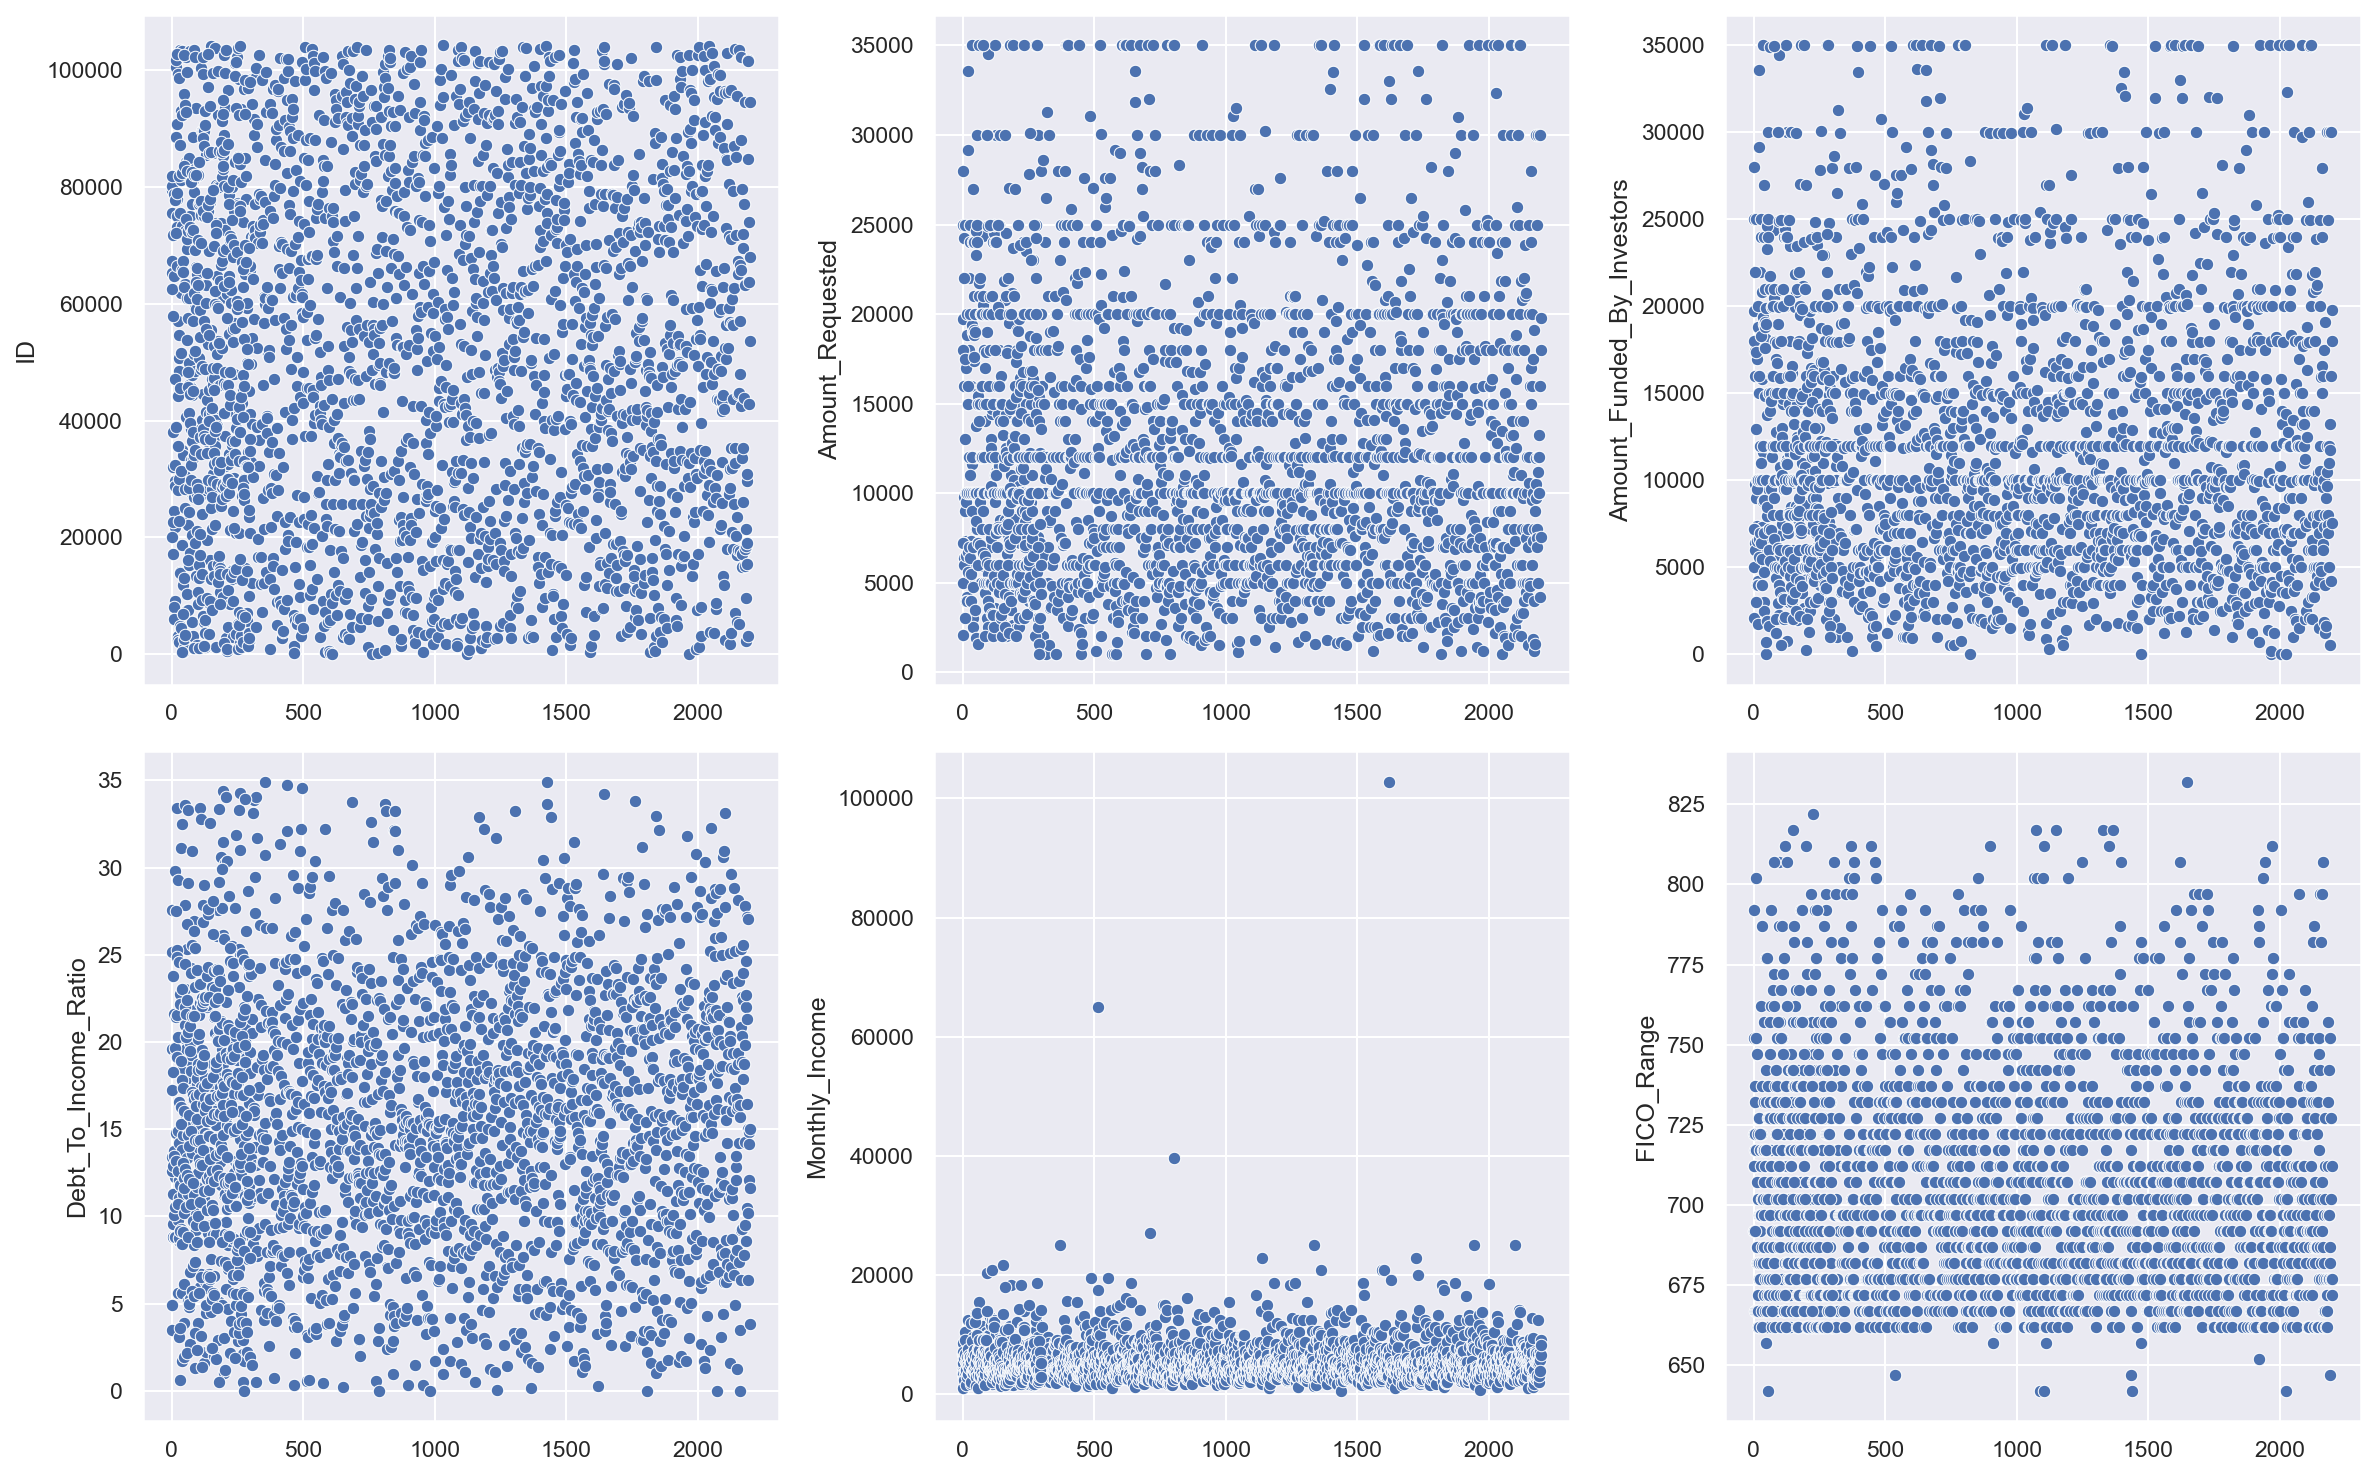

In [54]:
f, a = plt.subplots(2, 3, figsize=(16,10), dpi = 150)
ind = 0

for i in range(2):
    for j in range(3):
        sns.scatterplot(y = data[num_col[ind]], x = data[num_col[ind]].index, ax = a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

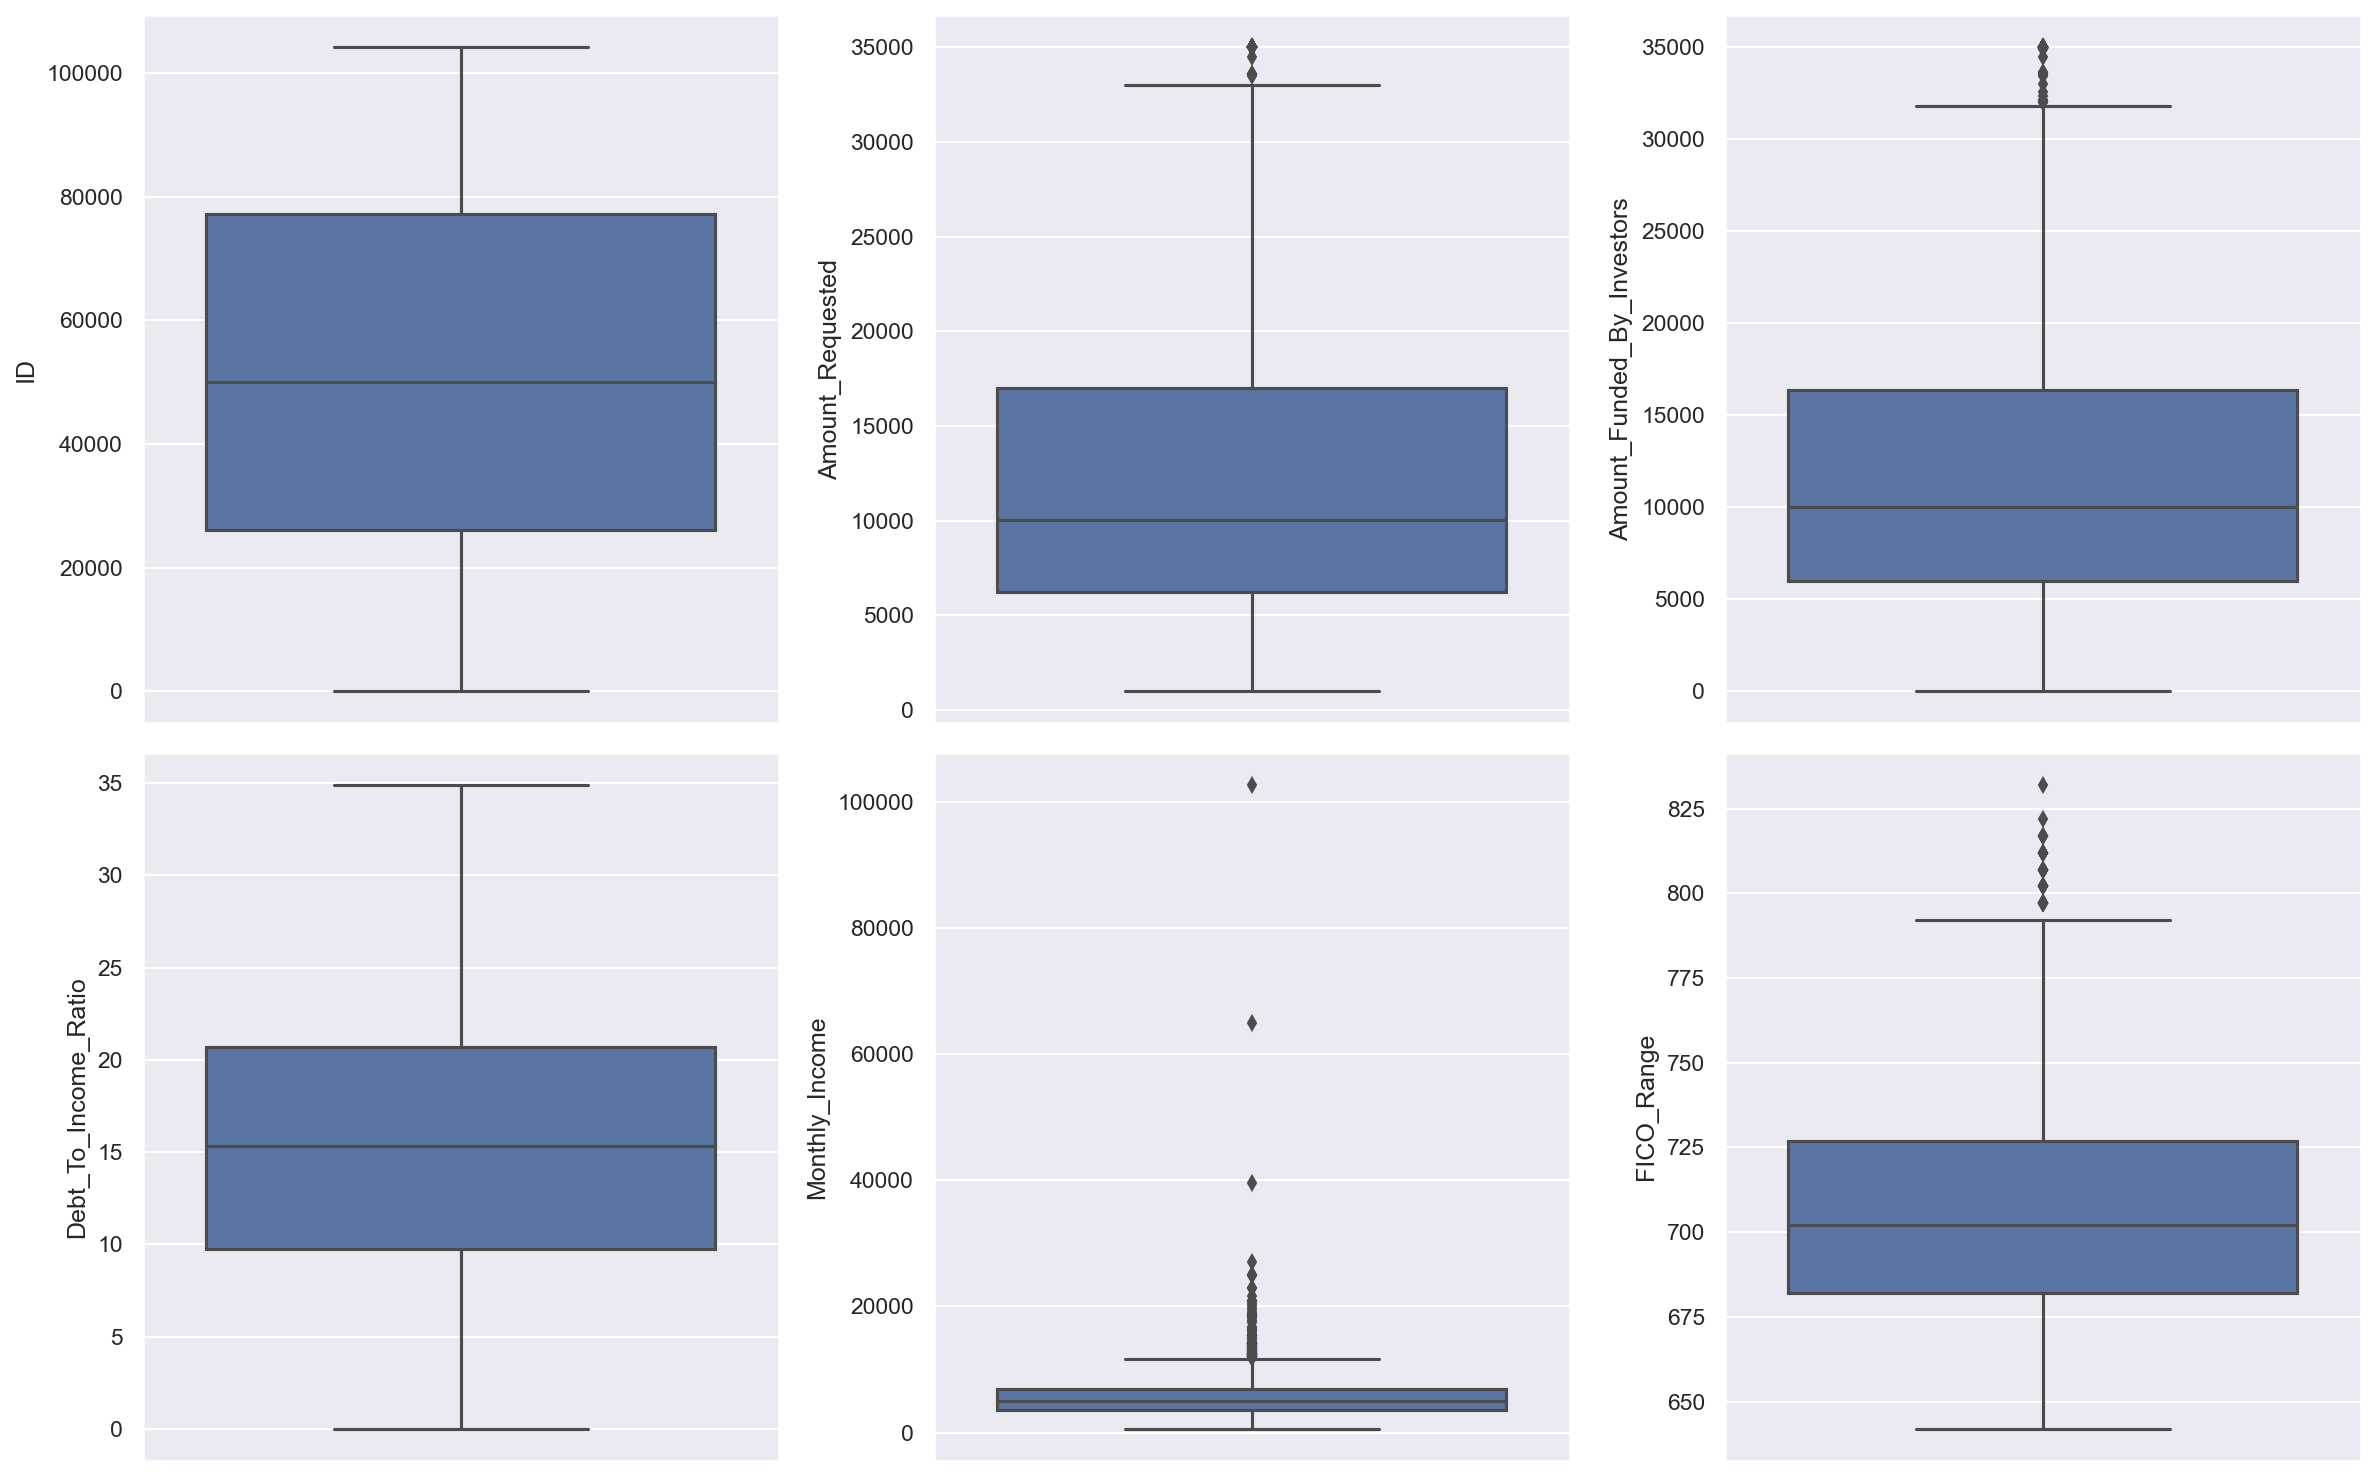

In [55]:
f, a = plt.subplots(2, 3, figsize=(16,10), dpi = 150)
ind = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(y = data[num_col[ind]], ax = a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

In [56]:
def out_trt(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3 - q1
    upper = q3+1.5*iqr
    lower = q1 - 1.5*iqr
    data[col] = np.where(data[col]>upper, upper,
                        np.where(data[col]<lower, lower,
                        data[col]))
for i in num_col:
    out_trt(i)

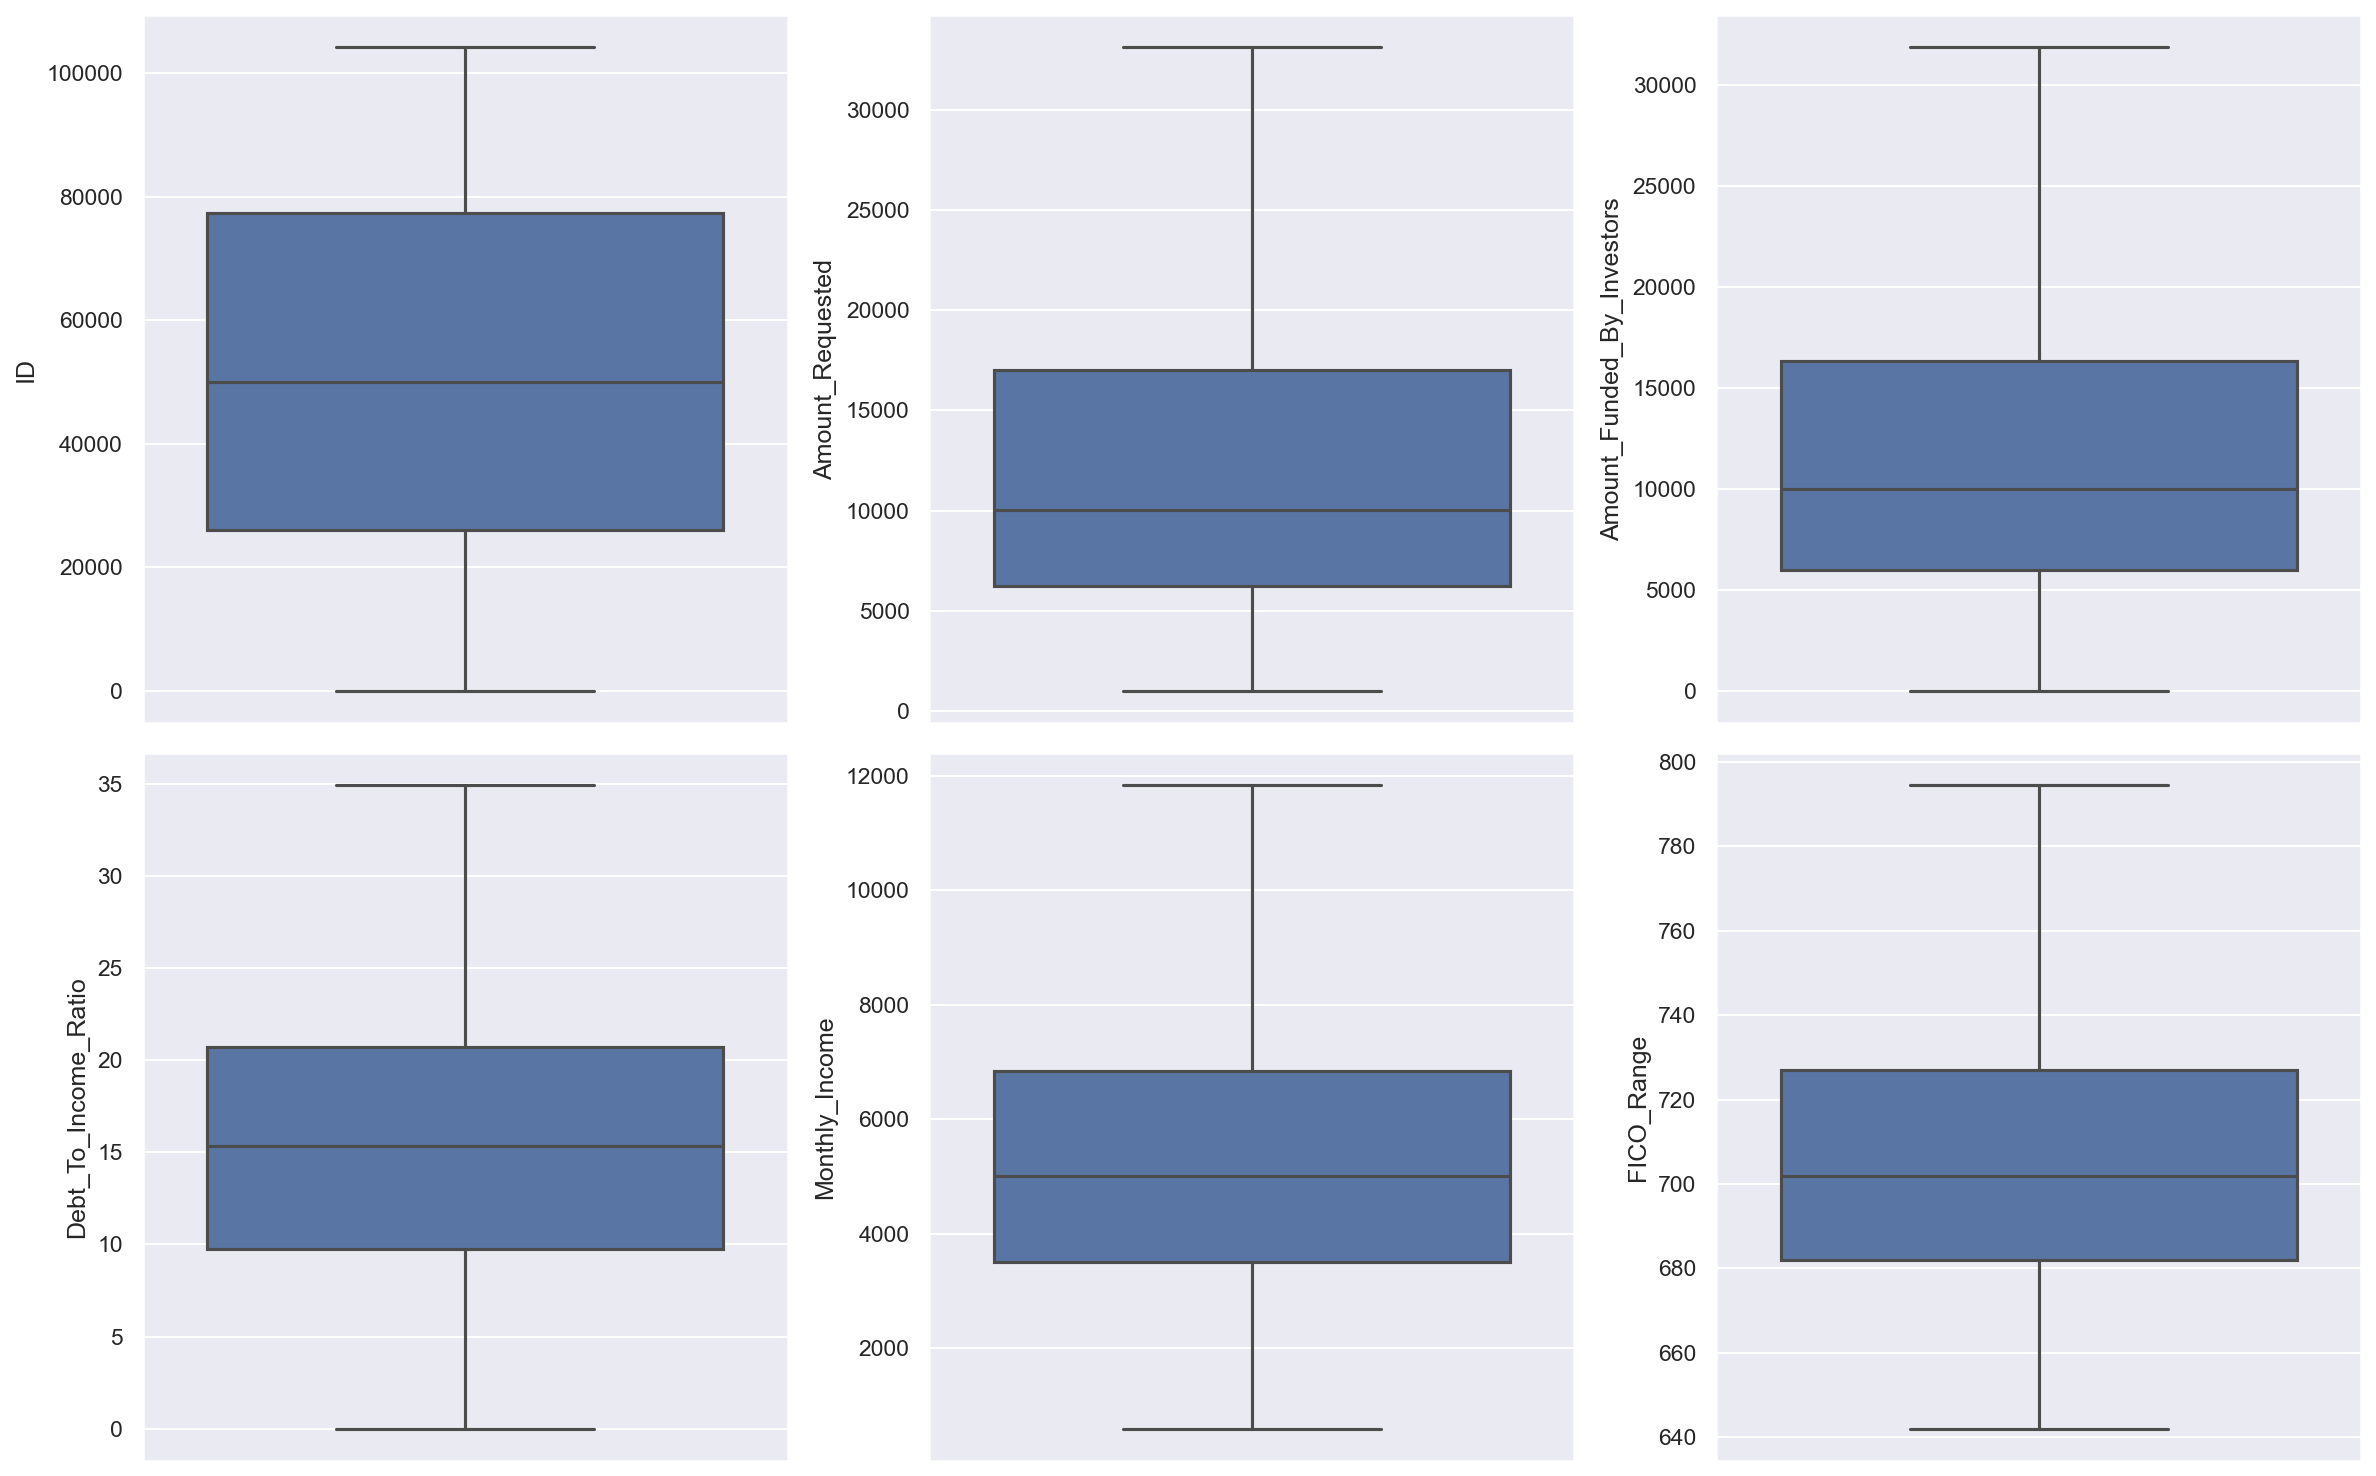

In [57]:
f, a = plt.subplots(2, 3, figsize=(16,10), dpi = 150)
ind = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(y = data[num_col[ind]], ax = a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

In [58]:
data.drop(['ID', 'State'], axis =1, inplace = True)

In [59]:
cat_col = []
for i in data:
    if i not in num_col and  i != 'Interest_Rate':
        cat_col.append(i)

In [60]:
cat_col

['Loan_Length',
 'Loan_Purpose',
 'Home_Ownership',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

In [61]:
data.Loan_Length.value_counts()

36.0    1862
60.0     533
Name: Loan_Length, dtype: int64

In [62]:
data.Loan_Purpose.value_counts()

debt_consolidation    1261
credit_card            427
other                  181
home_improvement       143
major_purchase          99
small_business          83
car                     49
wedding                 38
moving                  28
medical                 28
house                   20
vacation                20
educational             14
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [63]:
data.Loan_Purpose.replace(dict.fromkeys(data.Loan_Purpose.value_counts()[3:].index, ' major_purchase'), inplace = True)

In [64]:
data.Loan_Purpose.value_counts()

debt_consolidation    1261
 major_purchase        526
credit_card            427
other                  181
Name: Loan_Purpose, dtype: int64

In [65]:
data.Home_Ownership.value_counts()

RENT        1105
MORTGAGE    1099
OWN          186
OTHER          5
Name: Home_Ownership, dtype: int64

In [66]:
data.Home_Ownership.replace({'OTHER': 'OWN',}, inplace = True)

In [67]:
data.Home_Ownership.value_counts()

RENT        1105
MORTGAGE    1099
OWN          191
Name: Home_Ownership, dtype: int64

In [68]:
data.loc[data.Open_CREDIT_Lines == '.', 'Open_CREDIT_Lines'] = np.nan

In [69]:
data.Open_CREDIT_Lines.value_counts(dropna = False)

8      246
9      225
6      222
7      208
11     183
10     177
13     152
12     149
5      147
14     132
4       96
15      94
16      64
17      57
3       54
18      51
19      27
21      25
20      23
2       23
23      11
22       8
24       6
NaN      4
25       4
26       3
31       1
34       1
38       1
36       1
Name: Open_CREDIT_Lines, dtype: int64

In [70]:
data.Open_CREDIT_Lines.fillna(data.Open_CREDIT_Lines.mode()[0], inplace = True)

In [71]:
s = data.Open_CREDIT_Lines.value_counts(dropna=False)
s

8     250
9     225
6     222
7     208
11    183
10    177
13    152
12    149
5     147
14    132
4      96
15     94
16     64
17     57
3      54
18     51
19     27
21     25
2      23
20     23
23     11
22      8
24      6
25      4
26      3
31      1
34      1
38      1
36      1
Name: Open_CREDIT_Lines, dtype: int64

In [72]:
s=data.Open_CREDIT_Lines.replace(dict.fromkeys(s[len(s)-8::].index,22))

In [73]:
s.value_counts()

8     250
9     225
6     222
7     208
11    183
10    177
13    152
12    149
5     147
14    132
4      96
15     94
16     64
17     57
3      54
18     51
19     27
22     25
21     25
2      23
20     23
23     11
Name: Open_CREDIT_Lines, dtype: int64

In [74]:
s=s.replace({'15':'4','15':'4','17':'16','3':'16'})

In [75]:
data.Open_CREDIT_Lines.replace(dict.fromkeys(s.value_counts()[::-1][0:14].index,'17'),inplace=True)

In [76]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,MORTGAGE,8606.56,722.0,17,15210.0,3.0,5.0
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,MORTGAGE,6737.50,712.0,17,19070.0,3.0,4.0
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,OWN,1000.00,692.0,17,893.0,1.0,0.5
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,MORTGAGE,7083.33,712.0,17,38194.0,1.0,10.0
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0


In [77]:
data.Inquiries_in_the_Last_6_Months.value_counts()

0.0    1197
1.0     633
2.0     321
3.0     161
4.0      48
5.0      13
6.0       8
7.0       7
9.0       5
8.0       2
Name: Inquiries_in_the_Last_6_Months, dtype: int64

In [78]:
data.Inquiries_in_the_Last_6_Months.replace({6.0:4.0, 7.0:4.0, 9.0:4.0, 8.0:4.0}, inplace = True)

In [79]:
obj = []
for i in data:
    if data[i].dtype == object:
        obj.append(i)

In [80]:
obj.remove('Interest_Rate')

In [81]:
obj

['Loan_Purpose', 'Home_Ownership', 'Open_CREDIT_Lines']

In [82]:
# for non-ordinal data: - column_name = Loan_Purpose
data = pd.get_dummies(data, columns = ['Loan_Purpose'], dtype = int)

In [83]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_ major_purchase,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_other
0,25000.0,25000.00,18.49,60.0,27.56,MORTGAGE,8606.56,722.0,17,15210.0,3.0,5.0,0,0,1,0
1,19750.0,19750.00,17.27,60.0,13.39,MORTGAGE,6737.50,712.0,17,19070.0,3.0,4.0,0,0,1,0
2,2100.0,2100.00,14.33,36.0,3.50,OWN,1000.00,692.0,17,893.0,1.0,0.5,1,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,MORTGAGE,7083.33,712.0,17,38194.0,1.0,10.0,0,1,0,0
4,24250.0,17431.82,12.23,60.0,23.79,MORTGAGE,5833.33,732.0,6,31061.0,2.0,10.0,0,1,0,0


In [84]:
data.Home_Ownership.value_counts()

RENT        1105
MORTGAGE    1099
OWN          191
Name: Home_Ownership, dtype: int64

In [85]:
# on the basis of priority, let's make RENT= 1, MORTGAGE = 2, OWN = 3 
data.Home_Ownership = data.Home_Ownership.replace({'RENT': 1, 'MORTGAGE' : 2, 'OWN' : 3 })

In [86]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_ major_purchase,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_other
0,25000.0,25000.00,18.49,60.0,27.56,2,8606.56,722.0,17,15210.0,3.0,5.0,0,0,1,0
1,19750.0,19750.00,17.27,60.0,13.39,2,6737.50,712.0,17,19070.0,3.0,4.0,0,0,1,0
2,2100.0,2100.00,14.33,36.0,3.50,3,1000.00,692.0,17,893.0,1.0,0.5,1,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,2,7083.33,712.0,17,38194.0,1.0,10.0,0,1,0,0
4,24250.0,17431.82,12.23,60.0,23.79,2,5833.33,732.0,6,31061.0,2.0,10.0,0,1,0,0


In [87]:
# Let's split data intp train and test
test = data[data.Interest_Rate == 'testdata']

In [88]:
test.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_ major_purchase,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_other
0,5000.0,5000.0,testdata,60.0,12.59,1,4416.67,692.0,17,7686.0,0.0,0.5,1,0,0,0
1,18000.0,18000.0,testdata,60.0,4.93,1,5258.50,712.0,6,11596.0,0.0,10.0,0,0,1,0
2,7200.0,7200.0,testdata,60.0,25.16,2,3750.00,752.0,17,7283.0,0.0,6.0,0,0,1,0
3,7200.0,7200.0,testdata,36.0,17.27,2,3416.67,792.0,17,4838.0,0.0,10.0,0,0,1,0
4,22000.0,22000.0,testdata,60.0,18.28,2,6083.33,722.0,9,20181.0,0.0,8.0,0,0,1,0


In [89]:
test = test.drop('Interest_Rate', axis = 1)

In [90]:
train = data[data.Interest_Rate != 'testdata']

In [91]:
train.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_ major_purchase,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_other
0,25000.0,25000.00,18.49,60.0,27.56,2,8606.56,722.0,17,15210.0,3.0,5.0,0,0,1,0
1,19750.0,19750.00,17.27,60.0,13.39,2,6737.50,712.0,17,19070.0,3.0,4.0,0,0,1,0
2,2100.0,2100.00,14.33,36.0,3.50,3,1000.00,692.0,17,893.0,1.0,0.5,1,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,2,7083.33,712.0,17,38194.0,1.0,10.0,0,1,0,0
4,24250.0,17431.82,12.23,60.0,23.79,2,5833.33,732.0,6,31061.0,2.0,10.0,0,1,0,0


In [92]:
train.Interest_Rate = train.Interest_Rate.astype(float)

In [93]:
# Features and Targets
x = train.drop('Interest_Rate', axis = 1)

In [94]:
x.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Loan_Purpose_ major_purchase,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_other
0,25000.0,25000.00,60.0,27.56,2,8606.56,722.0,17,15210.0,3.0,5.0,0,0,1,0
1,19750.0,19750.00,60.0,13.39,2,6737.50,712.0,17,19070.0,3.0,4.0,0,0,1,0
2,2100.0,2100.00,36.0,3.50,3,1000.00,692.0,17,893.0,1.0,0.5,1,0,0,0
3,28000.0,28000.00,36.0,19.62,2,7083.33,712.0,17,38194.0,1.0,10.0,0,1,0,0
4,24250.0,17431.82,60.0,23.79,2,5833.33,732.0,6,31061.0,2.0,10.0,0,1,0,0


In [95]:
y = train['Interest_Rate']

In [96]:
y.head()

0    18.49
1    17.27
2    14.33
3    16.29
4    12.23
Name: Interest_Rate, dtype: float64

In [104]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
sc_x = min_max.fit_transform(x)


In [105]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(sc_x,y, test_size = 0.2, random_state = 150)

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [107]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_val)

In [108]:
lr.score(x_train, y_train)

0.7665919536373706

In [109]:
lr.score(x_val, y_val)

0.7835488088581568

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_train,y_train,cv =5)

In [111]:
print("Cross val score: ", scores)
print("Cross val mean score: ", scores.mean())

Cross val score:  [0.78249222 0.77237287 0.75572894 0.74087773 0.76180633]
Cross val mean score:  0.7626556169821194


### VIF

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(var, i) for i in range(var.shape[1])]
vif['Features'] = x.columns

In [113]:
vif

,variance_inflation_factor,Features
0,16.743547,Amount_Requested
1,16.361767,Amount_Funded_By_Investors
2,1.240808,Loan_Length
3,1.295113,Debt_To_Income_Ratio
4,1.074784,Home_Ownership
5,1.624192,Monthly_Income
6,1.135281,FICO_Range
7,1.160005,Open_CREDIT_Lines
8,1.332272,Revolving_CREDIT_Balance
9,1.045708,Inquiries_in_the_Last_6_Months


### PCA

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
x_pca = pca.fit_transform(x_train)

In [115]:
'''n_samples = 1684
x = rng.random((n_samples, 2))
rng = np.random.default_rng(seed=42)
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

# Generate y values with noise
y = x_train.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

# Fit linear regression model
model = LinearRegression()
model.fit(x_pca, y)

# Generate new data for testing the model
x_train_pca = rng.random((n_samples, 2))  # Assuming x_train is your new input data
y_train_pca = model.predict(pca.transform(x_train))

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Scatter plot for the first principal component
axes[0].scatter(x_pca[:, 0], y, alpha=0.3, label='Original Data')
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[0].legend()

# Scatter plot for the second principal component
axes[1].scatter(x_pca[:, 1], y, alpha=0.3, label='Original Data')
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
axes[1].legend()

# Plot regression line for new data
new_data_projection = pca.transform(x_train_n)
y_pred = model.predict(new_data_projection)
axes[1].scatter(new_data_projection[:, 1], y_pred, color='red', label='Regression Line (New Data)')
axes[1].legend()

plt.tight_layout()
plt.show()'''

'n_samples = 1684\nx = rng.random((n_samples, 2))\nrng = np.random.default_rng(seed=42)\n# Apply PCA\npca = PCA(n_components=2)\nx_pca = pca.fit_transform(x_train)\n\n# Generate y values with noise\ny = x_train.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2\n\n# Fit linear regression model\nmodel = LinearRegression()\nmodel.fit(x_pca, y)\n\n# Generate new data for testing the model\nx_train_pca = rng.random((n_samples, 2))  # Assuming x_train is your new input data\ny_train_pca = model.predict(pca.transform(x_train))\n\n# Plot the results\nfig, axes = plt.subplots(1, 2, figsize=(10, 3))\n\n# Scatter plot for the first principal component\naxes[0].scatter(x_pca[:, 0], y, alpha=0.3, label=\'Original Data\')\naxes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")\naxes[0].legend()\n\n# Scatter plot for the second principal component\naxes[1].scatter(x_pca[:, 1], y, alpha=0.3, label=\'Original Data\')\naxes[1].set(xlabel="Projected data onto second PCA componen

In [116]:

model = LinearRegression()
model.fit(x_pca, y_train)


score = model.score(x_pca, y_train)
print(f"R² score on new data: {score}")




R² score on new data: 0.7683343818367786
